# Load data

In [1]:
import pandas as pd
import glob
files1 = glob.glob("C:/S-3/2018_gold/*.csv")
gold = pd.concat([pd.read_csv(file, index_col=['date'], parse_dates=['date'], dayfirst=True) for file in files1])
files2 = glob.glob("C:/S-3/2018_nogold/*.csv")
nogold = pd.concat([pd.read_csv(file, index_col=['date'], parse_dates=['date'], dayfirst=True) for file in files2])
files3 = glob.glob("C:/S-3/2018_coal/*.csv")
coal = pd.concat([pd.read_csv(file, index_col=['date'], parse_dates=['date'], dayfirst=True) for file in files3])
files4 = glob.glob("C:/S-3/2018_nocoal/*.csv")
nocoal = pd.concat([pd.read_csv(file, index_col=['date'], parse_dates=['date'], dayfirst=True) for file in files4])

c:\python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.
c:\python\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
c:\python\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
c:\python\lib\s

# preprocess

In [2]:
import json
def preprocess_geo(data):
    data = data.reset_index(drop=True)
    data = data.join(
    data['.geo'].apply(lambda x: pd.Series(json.loads(x)))
    ).drop([".geo","system:index","type"],axis=1).reset_index(drop=True)


    data = data.join(
    data.coordinates.apply(lambda x: pd.Series(x,index=["longitude","latitude"]))).drop("coordinates",axis=1)

    data.longitude = data.longitude.apply(lambda x: round(x,3))
    data.latitude = data.latitude.apply(lambda x: round(x,3))
    
    return data.reset_index(drop=True)

In [3]:
gold  = preprocess_geo(gold)
nogold= preprocess_geo(nogold)
coal= preprocess_geo(coal)
nocoal = preprocess_geo(nocoal)
gold.loc[:, 'gold'] = 1
nogold.loc[:, 'gold'] = 0
coal.loc[:, 'coal'] = 1
nocoal.loc[:, 'coal'] = 0
data_gold = pd.concat([gold,nogold], ignore_index=True)
data_coal = pd.concat([coal,nocoal], ignore_index=True)

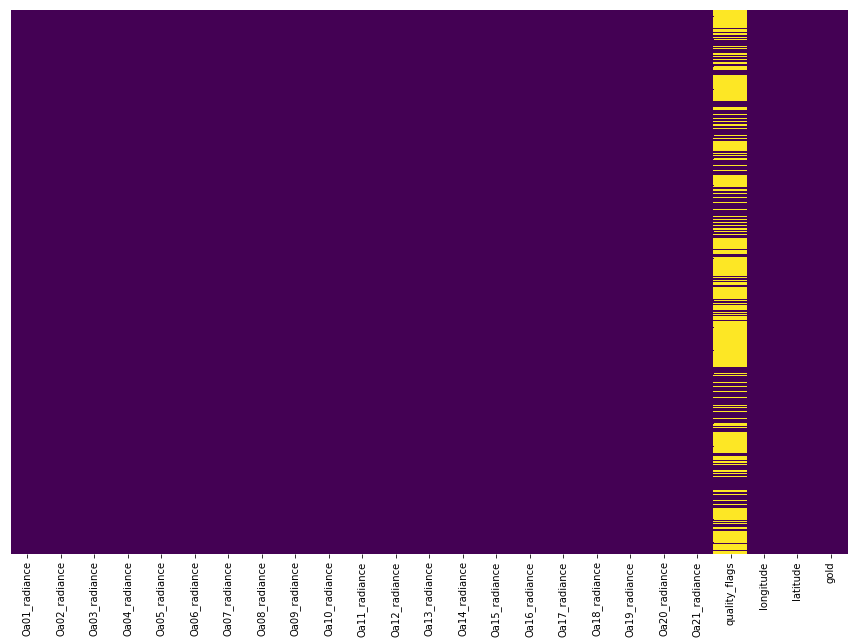

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.subplots(figsize=(15,10))
sns.heatmap(data_gold.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Correlation

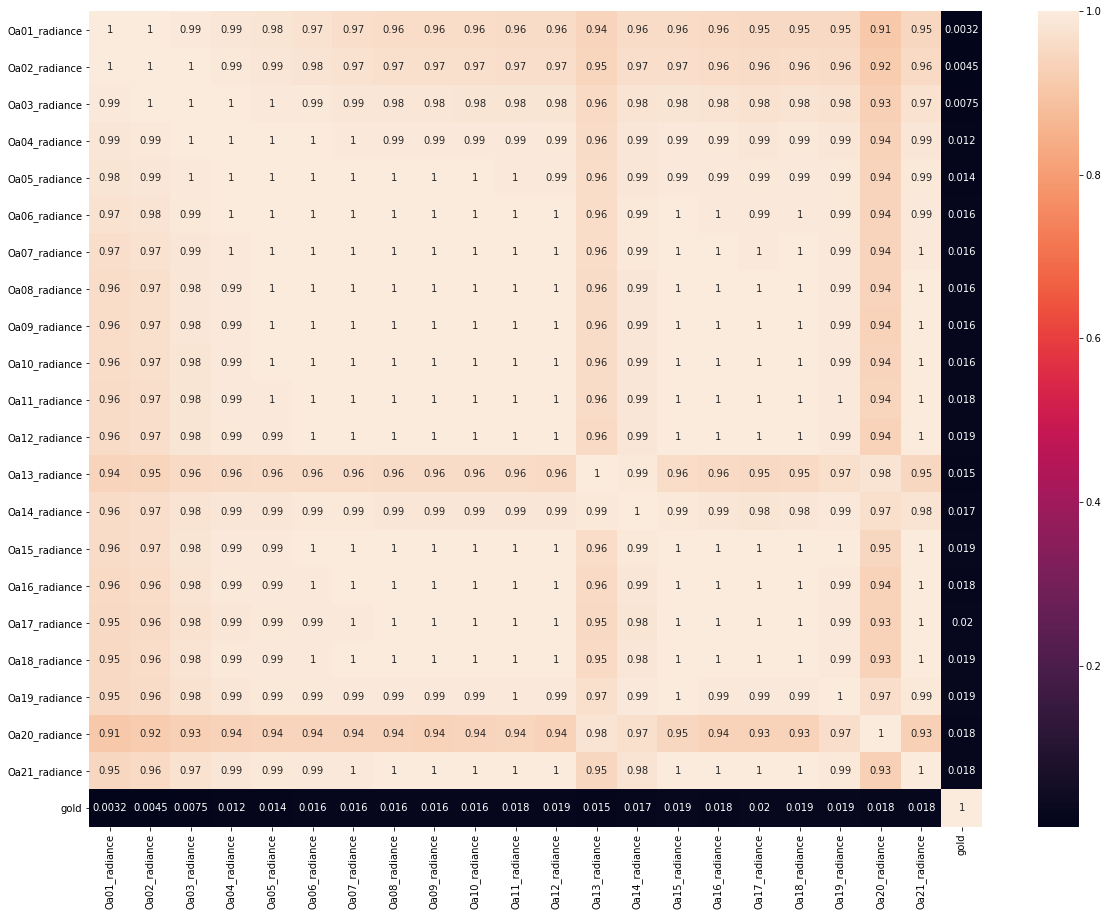

In [5]:
features = ['Oa01_radiance','Oa02_radiance','Oa03_radiance','Oa04_radiance','Oa05_radiance',
            'Oa06_radiance','Oa07_radiance','Oa08_radiance','Oa09_radiance','Oa10_radiance','Oa11_radiance',
            'Oa12_radiance','Oa13_radiance','Oa14_radiance','Oa15_radiance','Oa16_radiance','Oa17_radiance',
            'Oa18_radiance','Oa19_radiance','Oa20_radiance','Oa21_radiance','gold']
data = data_gold[features]
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)

##### Видим что параметры изображения практически ни как не влияют на местоположение заводов по добыче золота(нижняя строчка)

##### Попробуем посмотреть отличие параметров мест где есть завод и где его нет

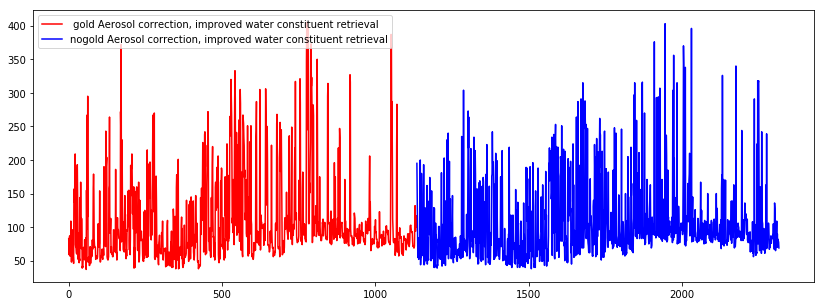

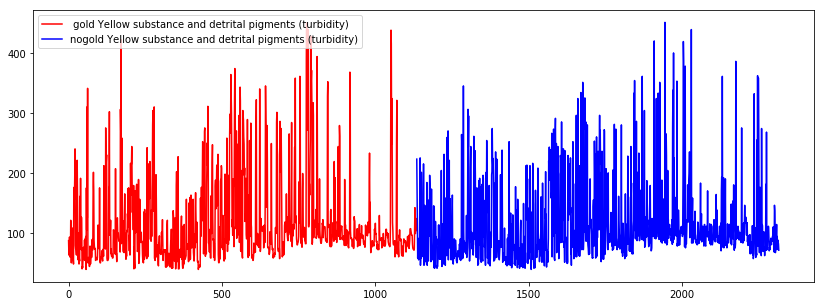

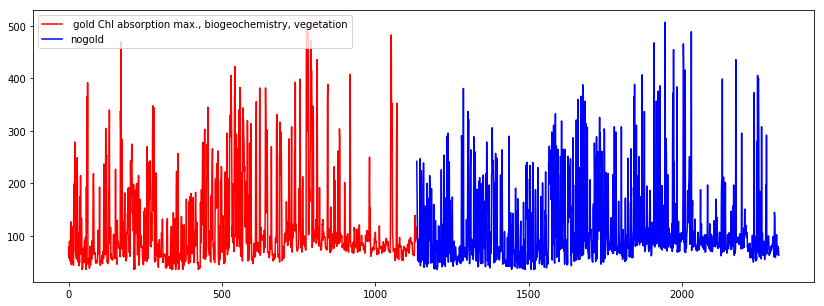

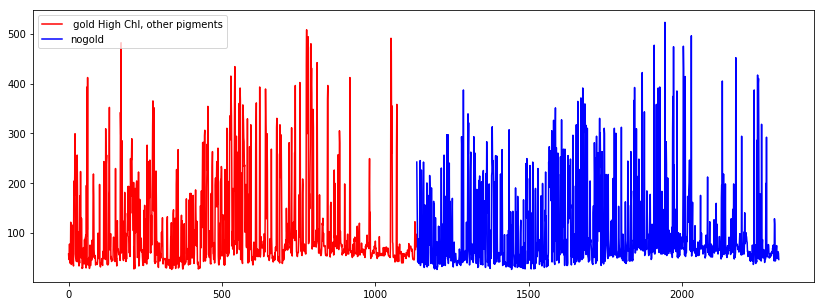

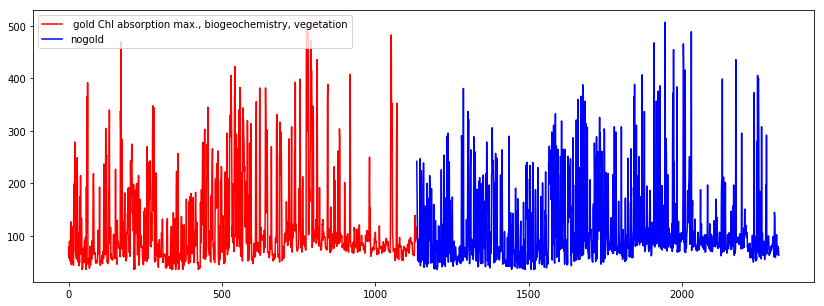

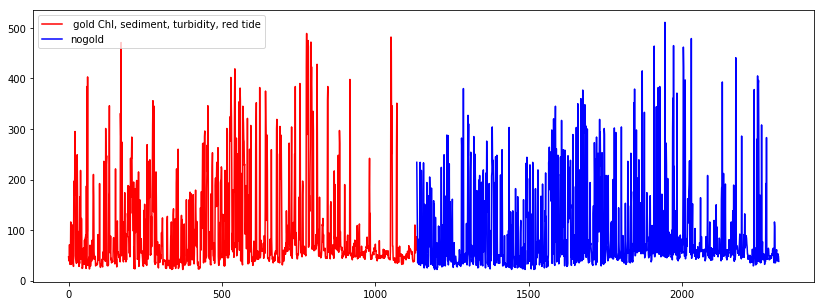

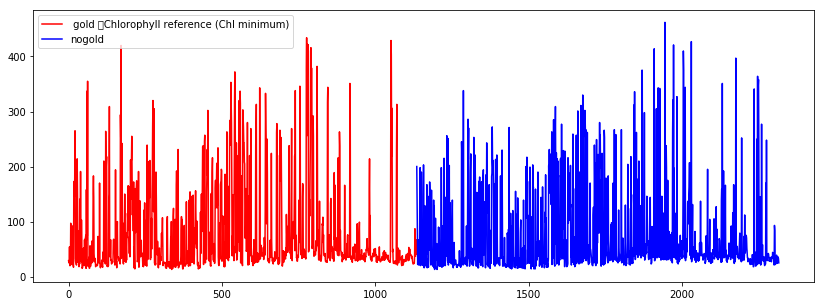

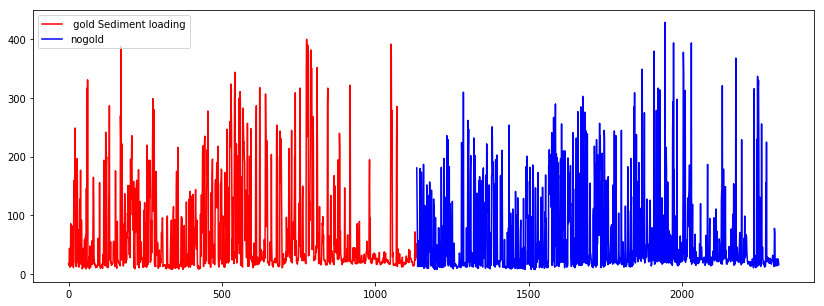

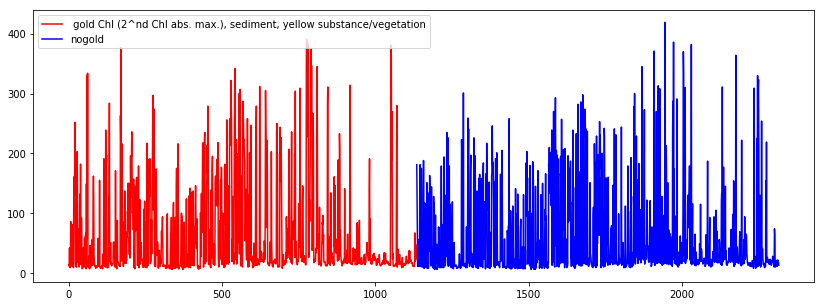

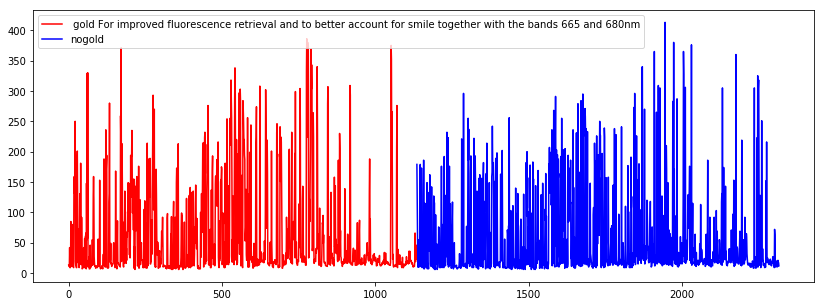

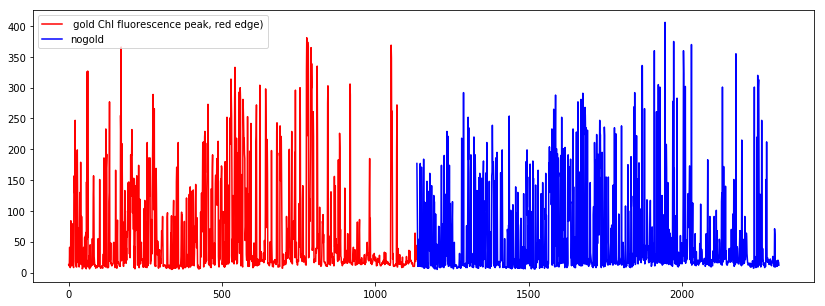

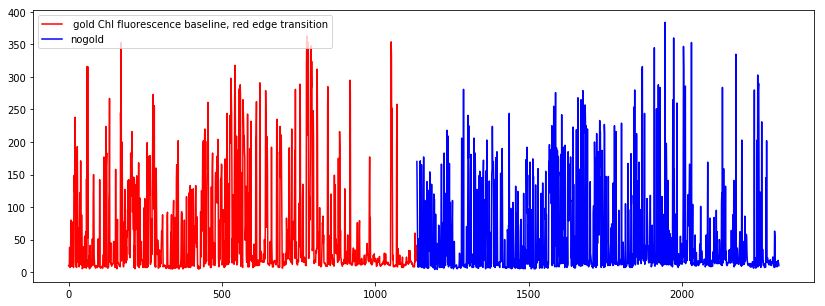

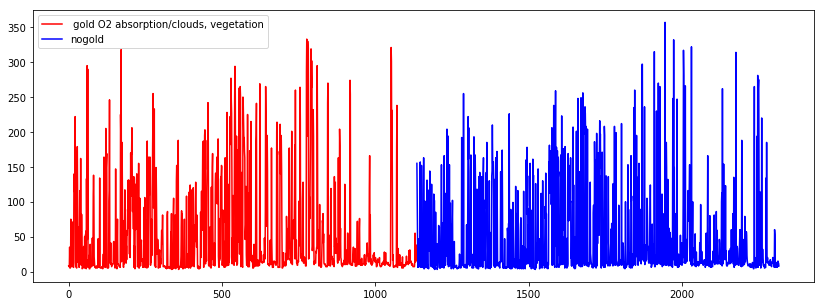

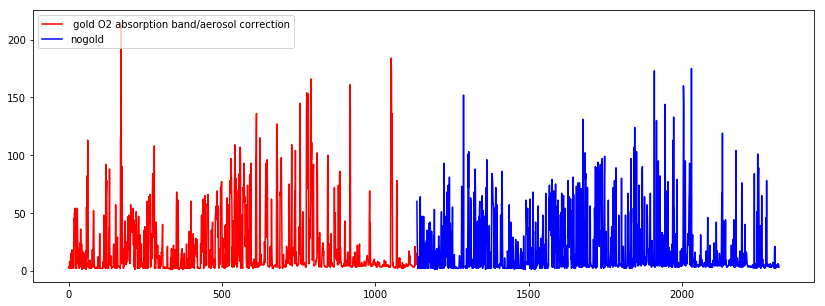

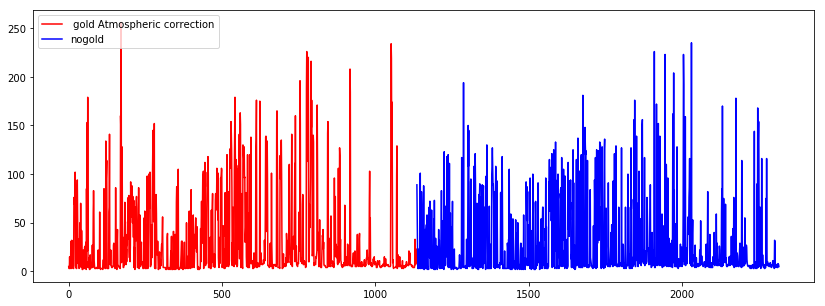

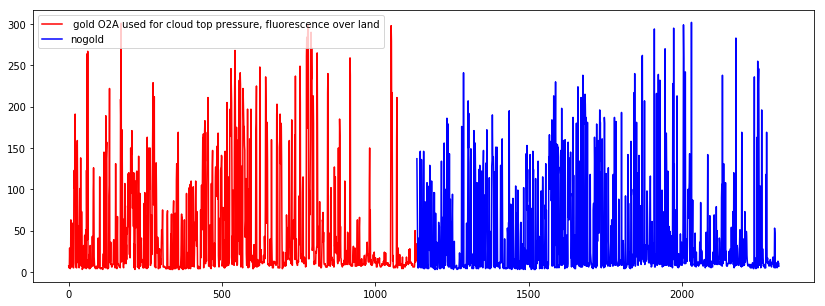

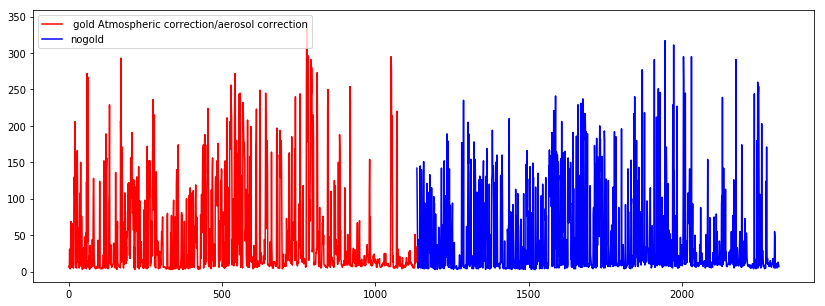

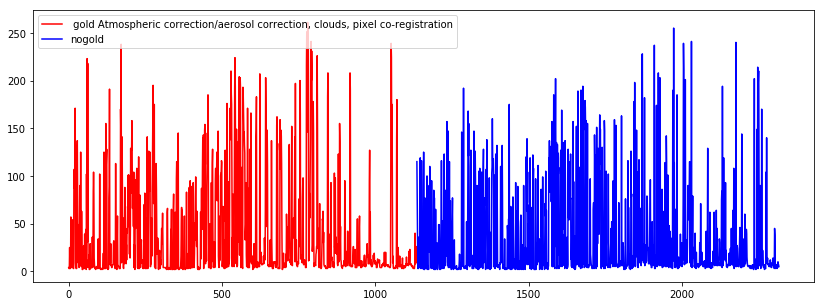

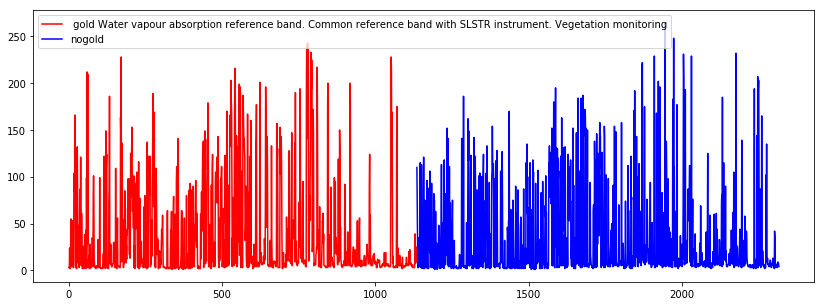

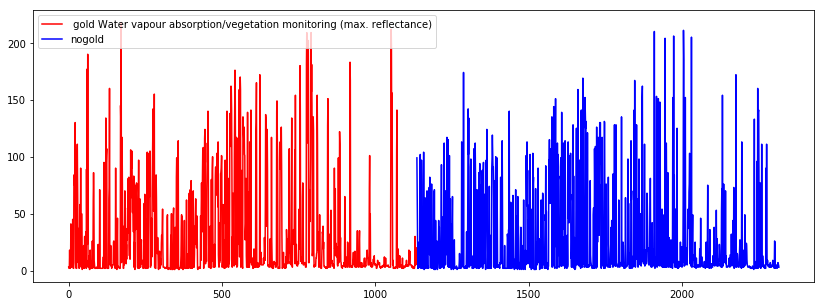

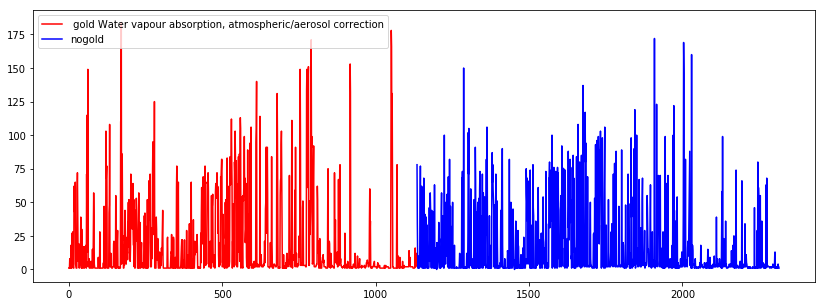

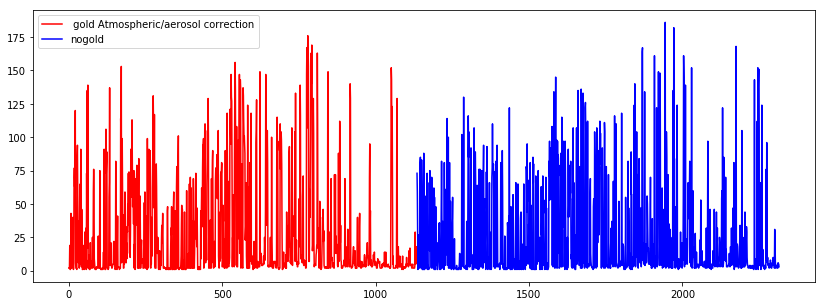

In [6]:
gold = data[data.gold==1]
nogold = data[data.gold==0]

plt.figure(figsize=(14,5))
plt.plot(gold.Oa01_radiance, color='red', label=' gold Aerosol correction, improved water constituent retrieval')
plt.plot(nogold.Oa01_radiance, color='blue', label='nogold Aerosol correction, improved water constituent retrieval')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa02_radiance, color='red', label=' gold Yellow substance and detrital pigments (turbidity)')
plt.plot(nogold.Oa02_radiance, color='blue', label='nogold Yellow substance and detrital pigments (turbidity)')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa03_radiance, color='red', label=' gold Chl absorption max., biogeochemistry, vegetation')
plt.plot(nogold.Oa03_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa04_radiance, color='red', label=' gold High Chl, other pigments')
plt.plot(nogold.Oa04_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa03_radiance, color='red', label=' gold Chl absorption max., biogeochemistry, vegetation')
plt.plot(nogold.Oa03_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa05_radiance, color='red', label=' gold Chl, sediment, turbidity, red tide')
plt.plot(nogold.Oa05_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa06_radiance, color='red', label=' gold 	Chlorophyll reference (Chl minimum)')
plt.plot(nogold.Oa06_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa07_radiance, color='red', label=' gold Sediment loading')
plt.plot(nogold.Oa07_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa08_radiance, color='red', label=' gold Chl (2^nd Chl abs. max.), sediment, yellow substance/vegetation')
plt.plot(nogold.Oa08_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa09_radiance, color='red', label=' gold For improved fluorescence retrieval and to better account for smile together with the bands 665 and 680nm')
plt.plot(nogold.Oa09_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa10_radiance, color='red', label=' gold Chl fluorescence peak, red edge)')
plt.plot(nogold.Oa10_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa11_radiance, color='red', label=' gold Chl fluorescence baseline, red edge transition')
plt.plot(nogold.Oa11_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa12_radiance, color='red', label=' gold O2 absorption/clouds, vegetation')
plt.plot(nogold.Oa12_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa13_radiance, color='red', label=' gold O2 absorption band/aerosol correction')
plt.plot(nogold.Oa13_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa14_radiance, color='red', label=' gold Atmospheric correction')
plt.plot(nogold.Oa14_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa15_radiance, color='red', label=' gold O2A used for cloud top pressure, fluorescence over land')
plt.plot(nogold.Oa15_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa16_radiance, color='red', label=' gold Atmospheric correction/aerosol correction')
plt.plot(nogold.Oa16_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa17_radiance, color='red', label=' gold Atmospheric correction/aerosol correction, clouds, pixel co-registration')
plt.plot(nogold.Oa17_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa18_radiance, color='red', label=' gold Water vapour absorption reference band. Common reference band with SLSTR instrument. Vegetation monitoring')
plt.plot(nogold.Oa18_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa19_radiance, color='red', label=' gold Water vapour absorption/vegetation monitoring (max. reflectance)')
plt.plot(nogold.Oa19_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa20_radiance, color='red', label=' gold Water vapour absorption, atmospheric/aerosol correction')
plt.plot(nogold.Oa20_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa21_radiance, color='red', label=' gold Atmospheric/aerosol correction')
plt.plot(nogold.Oa21_radiance, color='blue', label='nogold' )
plt.legend(loc='upper left')
plt.show()

# ML

In [7]:

df_1 = pd.read_csv('C:/S-3/2018_gold/gold_6.csv')
df_0 = pd.read_csv('C:/S-3/2018_nogold/gold_6.csv')
df_1 = preprocess_geo(df_1) 
df_0 = preprocess_geo(df_0) 
df_1.loc[:, 'gold'] = 1
df_0.loc[:, 'gold'] = 0
training_data = pd.concat([df_1,df_0], ignore_index=True)

In [8]:
features = ['Oa01_radiance','Oa02_radiance','Oa03_radiance','Oa04_radiance','Oa05_radiance',
            'Oa06_radiance','Oa07_radiance','Oa08_radiance','Oa09_radiance','Oa10_radiance','Oa11_radiance',
            'Oa12_radiance','Oa13_radiance','Oa14_radiance','Oa15_radiance','Oa16_radiance','Oa17_radiance',
            'Oa18_radiance','Oa19_radiance','Oa20_radiance','Oa21_radiance','gold']
X = training_data[features]
#print("Форма массива data: {}".format(X.shape))
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, training_data.gold, random_state=0)
# вычисляем среднее для каждого признака обучающего набора
mean_on_train = X_train.mean(axis=0)
# вычисляем стандартное отклонение для каждого признака обучающего набора
std_on_train = X_train.std(axis=0)
# вычитаем среднее и затем умножаем на обратную величину стандартного отклонения
# mean=0 и std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# используем ТО ЖЕ САМОЕ преобразование (используем среднее и стандартное отклонение
# обучающего набора) для тестового набора
X_test_scaled = (X_test - mean_on_train) / std_on_train

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print("Точність на навчальній вибірці: {:.3f}".format(
 knn.score(X_train_scaled, y_train)))
print("Точність на тестовій вибірці: {:.3f}".format(knn.score(X_test_scaled, y_test)))

Точність на навчальній вибірці: 0.984
Точність на тестовій вибірці: 0.952


In [10]:
pred = knn.predict(X_test_scaled)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[13  0]
 [ 1  7]]


In [11]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(y_test, pred)
cohen_score

0.896551724137931

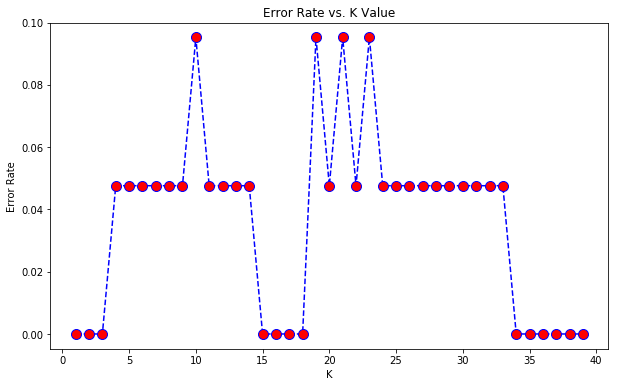

In [12]:
import numpy as np

error_rate = []
X_train = X_train_scaled
X_test = X_test_scaled
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)
rf = rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print("Точність на навчальній вибірці: %.5f" %accuracy_score(y_train, y_pred_train))
print("Точність на тестовій вибірці: %.5f" %accuracy_score(y_test, y_pred_test))

Точність на навчальній вибірці: 0.50820
Точність на тестовій вибірці: 0.61905


c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Coal

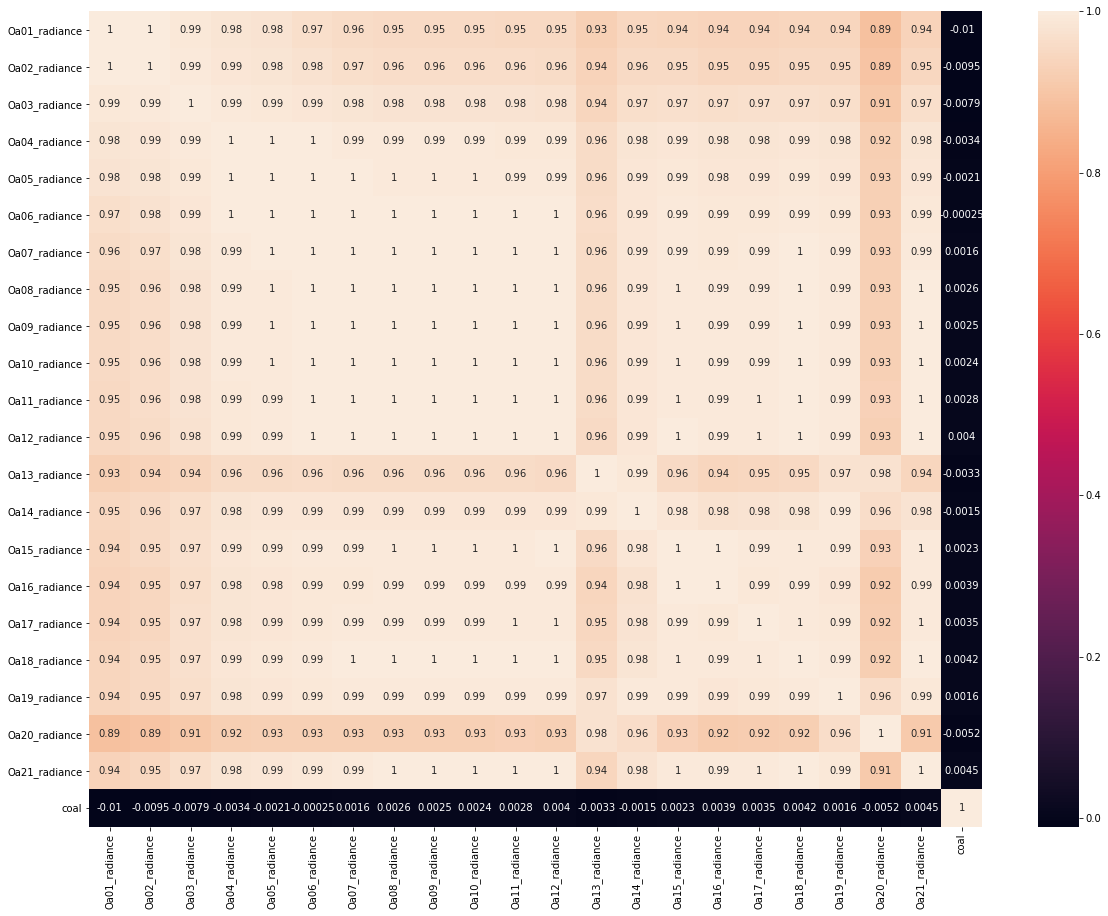

In [15]:
features = ['Oa01_radiance','Oa02_radiance','Oa03_radiance','Oa04_radiance','Oa05_radiance',
            'Oa06_radiance','Oa07_radiance','Oa08_radiance','Oa09_radiance','Oa10_radiance','Oa11_radiance',
            'Oa12_radiance','Oa13_radiance','Oa14_radiance','Oa15_radiance','Oa16_radiance','Oa17_radiance',
            'Oa18_radiance','Oa19_radiance','Oa20_radiance','Oa21_radiance','coal']
data = data_coal[features]
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)

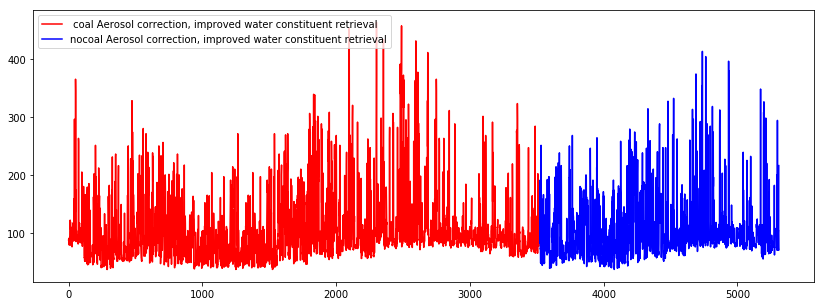

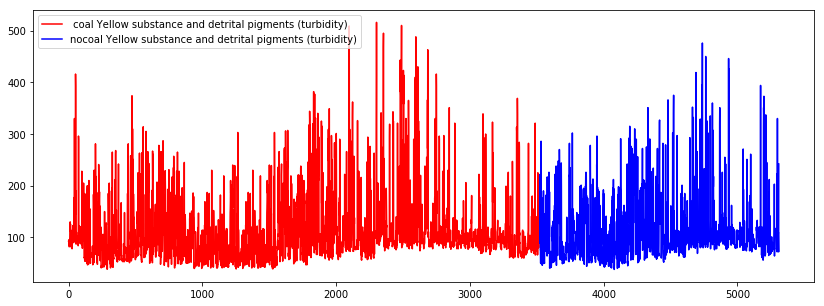

In [16]:
gold = data[data.coal==1]# coal
nogold = data[data.coal==0]# nocoal
plt.figure(figsize=(14,5))
plt.plot(gold.Oa01_radiance, color='red', label=' coal Aerosol correction, improved water constituent retrieval')
plt.plot(nogold.Oa01_radiance, color='blue', label='nocoal Aerosol correction, improved water constituent retrieval')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(gold.Oa02_radiance, color='red', label=' coal Yellow substance and detrital pigments (turbidity)')
plt.plot(nogold.Oa02_radiance, color='blue', label='nocoal Yellow substance and detrital pigments (turbidity)')
plt.legend(loc='upper left')
plt.show()

In [18]:
df_coal = pd.read_csv('C:/S-3/2018_coal/coal_6.csv')
df_nocoal = pd.read_csv('C:/S-3/2018_nocoal/coal_6.csv')
df_coal = preprocess_geo(df_coal) 
df_nocoal = preprocess_geo(df_nocoal) 
df_coal.loc[:, 'coal'] = 1
df_nocoal.loc[:, 'coal'] = 0
training_data = pd.concat([df_coal,df_nocoal], ignore_index=True)

c:\python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [21]:
features = ['Oa01_radiance','Oa02_radiance','Oa03_radiance','Oa04_radiance','Oa05_radiance',
            'Oa06_radiance','Oa07_radiance','Oa08_radiance','Oa09_radiance','Oa10_radiance','Oa11_radiance',
            'Oa12_radiance','Oa13_radiance','Oa14_radiance','Oa15_radiance','Oa16_radiance','Oa17_radiance',
            'Oa18_radiance','Oa19_radiance','Oa20_radiance','Oa21_radiance','coal']
X = training_data[features]
#print("Форма массива data: {}".format(X.shape))
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, training_data.coal, random_state=0)
# вычисляем среднее для каждого признака обучающего набора
mean_on_train = X_train.mean(axis=0)
# вычисляем стандартное отклонение для каждого признака обучающего набора
std_on_train = X_train.std(axis=0)
# вычитаем среднее и затем умножаем на обратную величину стандартного отклонения
# mean=0 и std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# используем ТО ЖЕ САМОЕ преобразование (используем среднее и стандартное отклонение
# обучающего набора) для тестового набора
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)
rf = rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print("Точність на навчальній вибірці: %.5f" %accuracy_score(y_train, y_pred_train))
print("Точність на тестовій вибірці: %.5f" %accuracy_score(y_test, y_pred_test))

Точність на навчальній вибірці: 0.62595
Точність на тестовій вибірці: 0.63636


c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# date

In [17]:
files5 = glob.glob("C:/S-3/2018_1(coal)/*.csv")
coal_1 = pd.concat([pd.read_csv(file,  index_col=['date'], parse_dates=['date'], dayfirst=True) for file in files5])

In [18]:
coal_1

,system:index,Oa01_radiance,Oa02_radiance,Oa03_radiance,Oa04_radiance,Oa05_radiance,Oa06_radiance,Oa07_radiance,Oa08_radiance,Oa09_radiance,...,Oa14_radiance,Oa15_radiance,Oa16_radiance,Oa17_radiance,Oa18_radiance,Oa19_radiance,Oa20_radiance,Oa21_radiance,quality_flags,.geo
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01 08:57:20,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,38.121021,39.295224,35.513099,27.482483,24.532888,19.858257,15.679746,14.450876,14.082832,...,12.854515,23.617289,25.959138,24.188465,23.946201,17.947948,7.700356,20.085567,2.147507e+09,"{""type"":""Polygon"",""coordinates"":[[[22.11912113..."
2018-01-02 08:31:09,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,68.166069,73.436477,71.005127,61.026679,56.480240,46.018776,38.803725,37.636727,37.025041,...,19.439485,39.698571,44.171617,39.063170,38.307398,28.877127,13.241089,30.899993,2.173715e+09,"{""type"":""Polygon"",""coordinates"":[[[22.11912113..."
2018-01-05 08:53:36,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,39.975952,41.153546,37.308790,28.830614,25.606543,20.659430,16.346700,15.078825,14.733061,...,14.123256,25.051075,26.959910,25.091485,24.727449,17.371851,6.106650,20.741796,2.147491e+09,"{""type"":""Polygon"",""coordinates"":[[[22.11912113..."
2018-01-06 08:27:25,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,60.601005,63.881268,58.235333,45.440419,40.552224,31.595768,24.749039,22.859701,22.357216,...,15.919268,32.232708,35.792283,32.808514,32.231258,21.840559,6.984843,26.659169,2.151718e+09,"{""type"":""Polygon"",""coordinates"":[[[22.11912113..."
2018-01-09 08:49:51,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,116.157781,130.292401,140.999122,139.750681,134.879829,117.969243,107.115429,104.343844,102.722088,...,60.677933,84.539031,85.370195,70.502252,68.393448,60.952198,45.665689,50.387892,2.282202e+09,"{""type"":""Polygon"",""coordinates"":[[[22.11912113..."
2018-01-10 08:23:40,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,97.087763,106.885056,111.387931,105.596507,100.663541,85.772725,76.855353,75.649265,74.553566,...,45.227721,66.979659,67.800205,57.334885,55.873878,49.243145,36.560990,42.998965,2.229517e+09,"{""type"":""Polygon"",""coordinates"":[[[22.11912113..."
2018-01-12 09:12:18,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,53.859626,57.568643,55.963936,48.394523,44.929434,37.420977,31.631609,30.399328,29.864918,...,17.376486,33.656313,37.290033,33.252098,32.562383,23.343461,9.389267,26.607993,2.172945e+09,"{""type"":""Polygon"",""coordinates"":[[[22.11912113..."
2018-01-13 08:46:07,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,132.411933,148.474105,161.843736,160.265890,152.907159,130.754911,119.152617,119.592203,118.196563,...,59.102969,96.035689,98.684930,81.789517,79.016117,63.570733,37.021264,57.746065,2.279973e+09,"{""type"":""Polygon"",""coordinates"":[[[22.11912113..."
2018-01-14 08:19:56,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,70.286178,73.743557,67.479328,52.250251,46.096702,34.987141,26.922440,24.945033,24.356008,...,18.716167,36.376892,39.123965,35.585504,34.862991,23.879277,7.869017,28.754079,2.153091e+09,"{""type"":""Polygon"",""coordinates"":[[[22.11912113..."


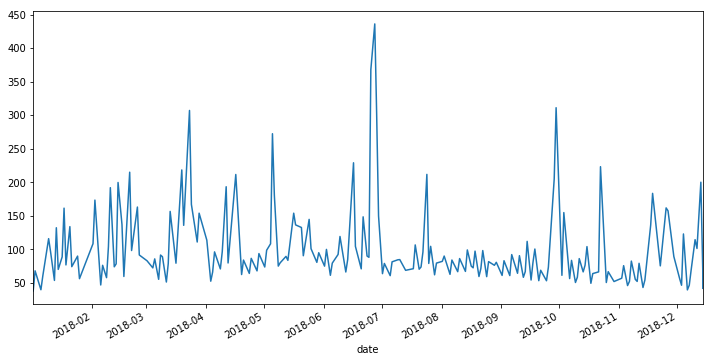

In [19]:

coal_1['Oa01_radiance'].plot(figsize=(12,6))



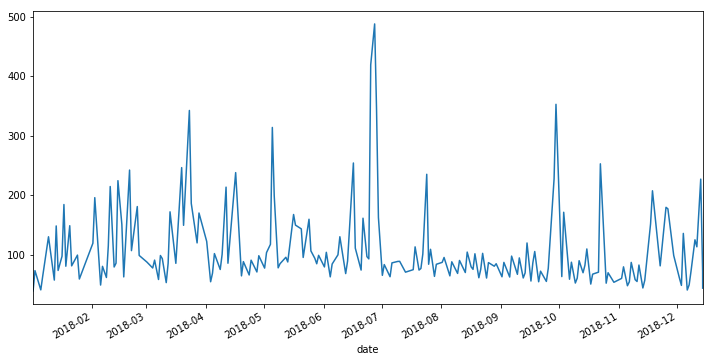

In [20]:

coal_1['Oa02_radiance'].plot(figsize=(12,6))

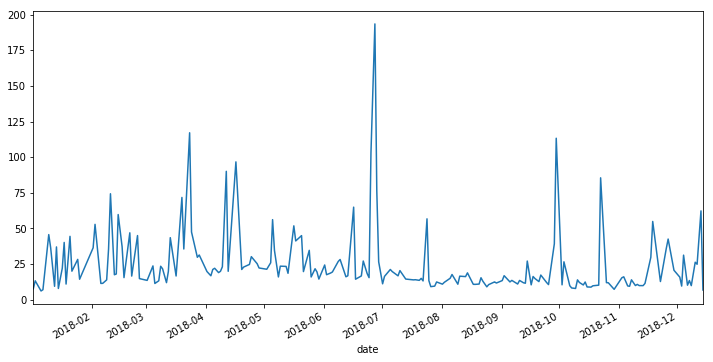

In [21]:

coal_1['Oa20_radiance'].plot(figsize=(12,6))

####  параметры очень хорошо между собой коррелировали, поэтому временной ряд не особо меняеться в зависимости от параметра

# Теперь посмотрим данные за 4 дня, а не за год

In [3]:
import pandas as pd
import glob
import json
files1 = glob.glob("C:/S-3/gold/*.csv")
gold = pd.concat([pd.read_csv(file) for file in files1])
files2 = glob.glob("C:/S-3/nogold/*.csv")
nogold = pd.concat([pd.read_csv(file) for file in files2])
files3 = glob.glob("C:/S-3/coal/*.csv")
coal = pd.concat([pd.read_csv(file) for file in files3])
files4 = glob.glob("C:/S-3/nocoal/*.csv")
nocoal = pd.concat([pd.read_csv(file) for file in files4])
def drop_geo(data):
    return data.drop('.geo',1) # drop the Cabin column
def drop_s(data):
    return data.drop('system:index',1) # drop the Cabin column
gold  = drop_geo(gold)
gold  = drop_s(gold)
nogold= drop_geo(nogold)
nogold = drop_s(nogold)
coal= drop_geo(coal)
coal= drop_s(coal)
nocoal = drop_geo(nocoal)
nocoal = drop_s(nocoal)
gold.loc[:, 'gold'] = 1
nogold.loc[:, 'gold'] = 0
coal.loc[:, 'coal'] = 1
nocoal.loc[:, 'coal'] = 0
data_gold = pd.concat([gold,nogold], ignore_index=True)
data_coal = pd.concat([coal,nocoal], ignore_index=True)
data_gold

,Oa01_radiance,Oa02_radiance,Oa03_radiance,Oa04_radiance,Oa05_radiance,Oa06_radiance,Oa07_radiance,Oa08_radiance,Oa09_radiance,Oa10_radiance,...,Oa15_radiance,Oa16_radiance,Oa17_radiance,Oa18_radiance,Oa19_radiance,Oa20_radiance,Oa21_radiance,date,quality_flags,gold
0,170.144451,188.237667,206.465471,206.478047,199.095484,175.339405,160.121757,157.089798,154.916944,152.786277,...,127.699942,130.408203,106.400024,101.939520,87.444748,57.356252,65.351314,2018-04-01T10:01:40,2.240491e+09,1
1,172.505951,193.557452,209.642011,208.575377,201.861210,177.421794,161.055962,157.664680,155.189549,153.195789,...,128.798426,131.460931,106.573995,100.502505,77.713977,39.231344,62.356162,2018-04-02T09:35:29,2.237252e+09,1
2,55.661015,57.596694,53.097489,42.375426,40.107361,41.119512,28.607629,23.573334,22.579781,22.393874,...,96.821252,104.952928,90.994492,88.672685,68.510685,31.509076,64.027596,2018-04-01T10:04:40,2.154092e+09,1
3,68.347997,72.234532,66.199984,53.068567,50.377836,51.466577,36.451241,29.948086,28.616760,28.269087,...,103.135442,115.187391,99.289898,96.875007,75.041489,35.159128,70.522080,2018-04-02T09:38:29,2.148940e+09,1
4,212.898041,236.867954,255.359342,250.063906,240.109602,208.770106,187.906652,183.555245,180.656477,178.370184,...,161.191202,160.590552,132.732811,128.061222,109.739764,78.534048,92.718678,2018-04-03T09:12:18,2.286647e+09,1
5,91.077852,95.889077,89.609320,73.526493,67.820519,58.402958,48.891888,46.518019,45.575263,45.333573,...,72.254094,76.963951,69.126514,67.742686,49.697261,20.319384,54.853108,2018-04-01T08:23:40,2.153466e+09,1
6,53.825734,56.062815,52.791231,44.473988,42.098846,39.796229,34.694067,33.085369,32.419206,32.316734,...,56.029781,60.673463,55.041845,54.058340,40.269755,17.077916,44.033602,2018-04-03T09:09:18,2.152674e+09,1
7,112.218762,120.025958,117.312638,102.265826,95.264155,80.579722,70.228219,68.810109,67.789548,67.196821,...,78.886237,82.866075,73.295095,71.756134,54.624303,25.401748,58.460635,2018-04-01T08:23:40,2.175351e+09,1
8,53.525978,55.535516,52.282193,43.958923,41.316405,38.253480,34.165978,33.071012,32.511585,32.439022,...,50.145412,53.480137,49.124660,48.444786,36.688094,16.188371,40.610185,2018-04-03T09:09:18,2.155618e+09,1
9,248.559602,277.765893,302.430446,298.448960,285.052435,242.104909,220.640018,222.614072,220.229512,217.950832,...,181.542244,182.484917,151.037500,145.782319,124.673604,83.749731,105.997559,2018-04-01T08:20:40,2.286710e+09,1


# Correlation

## 1) Gold

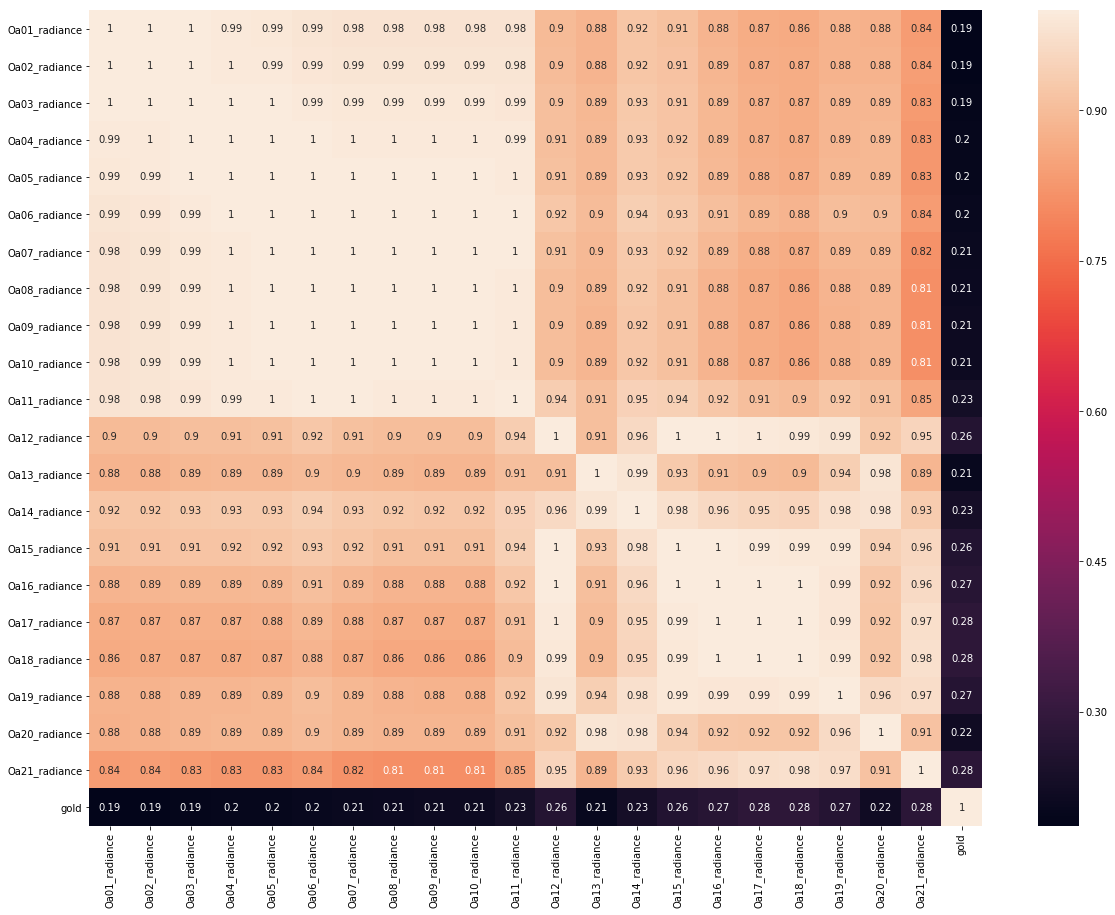

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
features = ['Oa01_radiance','Oa02_radiance','Oa03_radiance','Oa04_radiance','Oa05_radiance',
            'Oa06_radiance','Oa07_radiance','Oa08_radiance','Oa09_radiance','Oa10_radiance','Oa11_radiance',
            'Oa12_radiance','Oa13_radiance','Oa14_radiance','Oa15_radiance','Oa16_radiance','Oa17_radiance',
            'Oa18_radiance','Oa19_radiance','Oa20_radiance','Oa21_radiance','gold']
plt.subplots(figsize=(20,15))
sns.heatmap(data_gold[features ].corr(), annot=True)

# 2) Coal

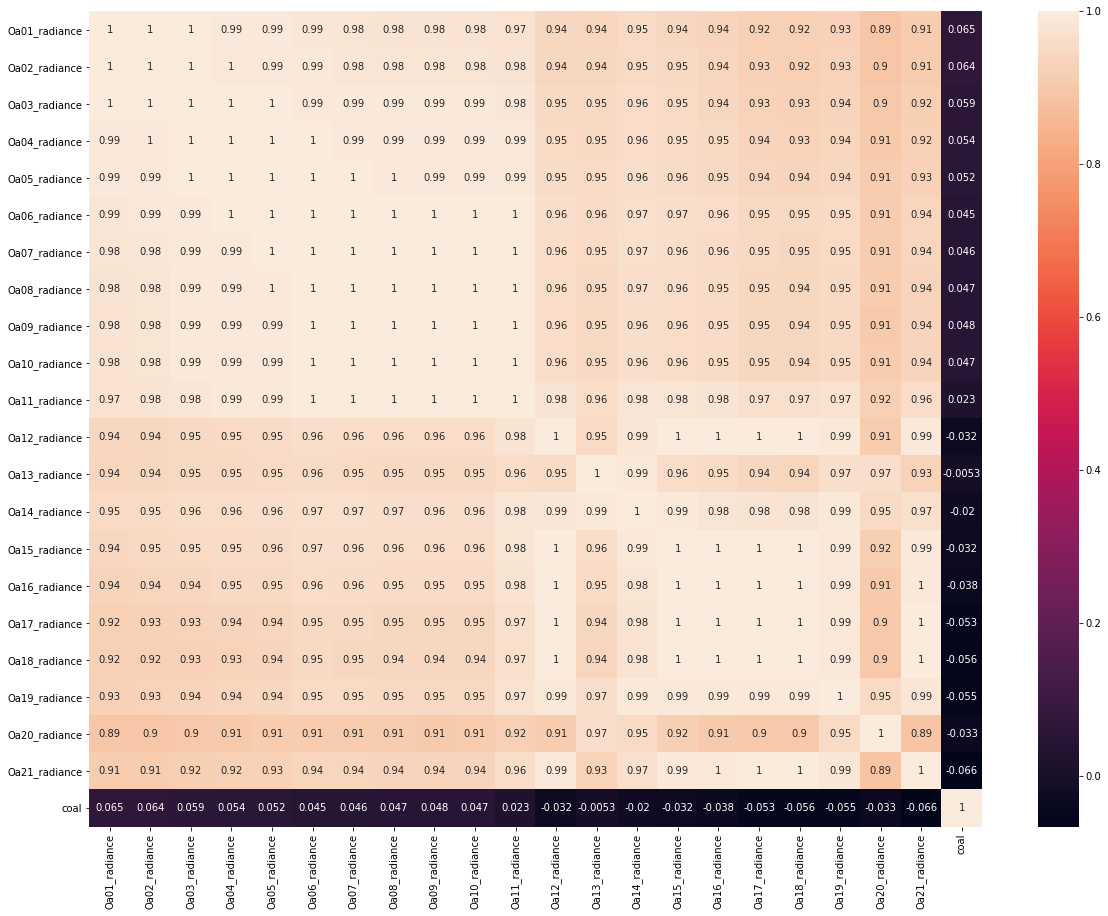

In [5]:
features = ['Oa01_radiance','Oa02_radiance','Oa03_radiance','Oa04_radiance','Oa05_radiance',
            'Oa06_radiance','Oa07_radiance','Oa08_radiance','Oa09_radiance','Oa10_radiance','Oa11_radiance',
            'Oa12_radiance','Oa13_radiance','Oa14_radiance','Oa15_radiance','Oa16_radiance','Oa17_radiance',
            'Oa18_radiance','Oa19_radiance','Oa20_radiance','Oa21_radiance','coal']
plt.subplots(figsize=(20,15))
sns.heatmap(data_coal[features].corr(), annot=True)

### видим что зависимость стала лучше чем в случае с данными за год, однако все равно достаточно маленькая чтобы по ним можно было отличить где находится завод, а где нет. Пробуем построить классификатор

In [6]:
training_data = data_gold
features = ['Oa01_radiance','Oa02_radiance','Oa03_radiance','Oa04_radiance','Oa05_radiance',
            'Oa06_radiance','Oa07_radiance','Oa08_radiance','Oa09_radiance','Oa10_radiance','Oa11_radiance',
            'Oa12_radiance','Oa13_radiance','Oa14_radiance','Oa15_radiance','Oa16_radiance','Oa17_radiance',
            'Oa18_radiance','Oa19_radiance','Oa20_radiance','Oa21_radiance','gold']
X = training_data[features]
#print("Форма массива data: {}".format(X.shape))
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, training_data.gold, random_state=0)
# вычисляем среднее для каждого признака обучающего набора
mean_on_train = X_train.mean(axis=0)
# вычисляем стандартное отклонение для каждого признака обучающего набора
std_on_train = X_train.std(axis=0)
# вычитаем среднее и затем умножаем на обратную величину стандартного отклонения
# mean=0 и std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# используем ТО ЖЕ САМОЕ преобразование (используем среднее и стандартное отклонение
# обучающего набора) для тестового набора
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)
rf = rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print("Точність на навчальній вибірці: %.5f" %accuracy_score(y_train, y_pred_train))
print("Точність на тестовій вибірці: %.5f" %accuracy_score(y_test, y_pred_test))

Точність на навчальній вибірці: 0.75000
Точність на тестовій вибірці: 1.00000


c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Переобучение, поскольку количество заводов достаточно маленькое 